In [1]:
from linux_qm.qm.crest.crest import conformer_pipeline
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


original_pkl 707
conf_pkl 4 1625
conf_pkl 5 1625
num conf: 4
bytes per atom (conformers): 7.343999999999999
cwd: /home/ergot/linux_qm/notebooks
tmp_path: .crest_tmp/eb3101fb-884a-46c7-ab76-3b0ae2778e51


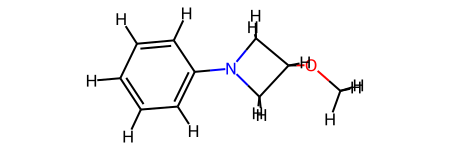

In [2]:
smi = 'OC1CC(Nc2ccccc2)C1'
smi = 'COC1CN(c2ccccc2)C1'

mol = conformer_pipeline(smi, n_jobs=8)
mol

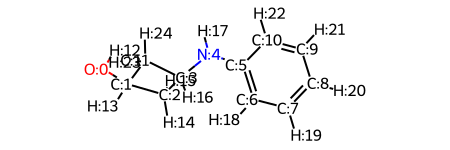

In [3]:
for atom in mol.GetAtoms():
    # if atom.GetSymbol() != 'H':
    atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
mol

In [3]:
import py3Dmol

AllChem.AlignMolConformers(mol)
print('num conformers', mol.GetNumConformers())

# Visualize using Py3Dmol
viewer = py3Dmol.view(width=600, height=400)
mol_block = Chem.MolToMolBlock(mol, confId=0)
# viewer.addModel(mol_block, "mol")

for conf in mol.GetConformers():
    mol_block = Chem.MolToMolBlock(mol, confId=conf.GetId())
    viewer.addModel(mol_block, "mol")
viewer.setStyle({"stick": {}})
viewer.setBackgroundColor("white")
viewer.show()

num conformers 4


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [10]:
import numpy as np

rms_matr = np.empty((mol.GetNumConformers(), mol.GetNumConformers()))
conf_ids = [conf.GetId() for conf in mol.GetConformers()]

for i in conf_ids:
    for j in conf_ids:
        rms_matr[i,j] = AllChem.GetConformerRMS(mol, i, j)
        
print(np.array2string(rms_matr, max_line_width=80, precision=3, separator='  '))

[[0.     0.74   2.041  2.106]
 [0.74   0.     2.04   2.146]
 [2.041  2.04   0.     0.442]
 [2.106  2.146  0.442  0.   ]]


In [11]:
# query = Chem.MolFromSmarts('cccccc')
query = Chem.MolFromSmarts('cccccc')
atom_map = mol.GetSubstructMatch(query)

print(atom_map)

AllChem.AlignMolConformers(mol, atomIds=atom_map)
# AllChem.AlignMolConformers(mol, maxIters=1000)

viewer = py3Dmol.view(width=600, height=400)

for conf in mol.GetConformers():
    # if conf.GetId() in [1, 2]:
    mol_block = Chem.MolToMolBlock(mol, confId=conf.GetId())
    # print(conf.GetId())
    viewer.addModel(mol_block, "mol")
viewer.setStyle({"stick": {}})
viewer.setBackgroundColor("white")
viewer.show()

(5, 6, 7, 8, 9, 10)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol